# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [1]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [2]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

print( A @ e_1, A @ e_2, A @ e_3 )



[1 4 7] [2 5 8] [3 6 9]


The basis vectors $e_1$, $e_2$, and $e_3$ select the first, second, or third column of the matrix.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [3]:
u = np.ones(3)

print( A @ u )

[ 6. 15. 24.]


This sums each row of the matrix, since
$$
\left[ \begin{array}{ccc} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{array} \right] \left[ \begin{array}{c}1 \\ 1 \\ 1 \end{array} \right]  = \left[ \begin{array}{c} 1 + 2 + 3 \\ 4 + 5 + 6 \\ 7+8+9 \end{array} \right] = \left[ \begin{array}{c} 6 \\ 15 \\ 24 \end{array} \right]
$$

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [4]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])

print(A @ x)

[-2  4 11]


This returns $x$, since 
$$
\left[ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right] \left[ \begin{array}{c} x_1 \\ x_2 \\ x_3 \end{array} \right]  = \left[ \begin{array}{c} x_1 + 0 + 0 \\ 0 + x_2 + 0 \\ 0+0+x_3 \end{array} \right] = \left[ \begin{array}{c} x_1 \\ x_2 \\ x_3 \end{array} \right]
$$

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [5]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

print( A @ x )

[11 -2  4]




This rearranges $x$ since
$$
\left[ \begin{array}{ccc} 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{array} \right] \left[ \begin{array}{c} x_1 \\ x_2 \\ x_3 \end{array} \right]  = \left[ \begin{array}{c} 0 + 0 + x_3 \\ x_1 + 0 + 0 \\ 0+x_2+0 \end{array} \right] = \left[ \begin{array}{c} x_3 \\ x_1 \\ x_2 \end{array} \right]
$$

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [6]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)



print('\n', A @ e_1, '\n', A @ e_2, '\n', A @ e_3 )

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]

 [0.50052958 0.02574731 0.47372311] 
 [0.24049286 0.39251588 0.36699127] 
 [0.18358131 0.37907577 0.43734292]


Multiplying $A$ times each of the basis vectors returns that column of $A$. Imagine it like this: We know with probability 1 whether we're in state 1, 2 or 3. We multiple that initial mass function times $A$, and get a new mass function that "moves mass across states". So starting from each state, the column values are the predicted probabilities of the next state.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [7]:
for e in [e_1, e_2, e_3]:
    p = e
    for t in range(5):
        p = A @ p
    print(f'For {e}: {p}')



For [1 0 0]: [0.29266551 0.27862515 0.42870935]
For [0 1 0]: [0.29197422 0.27979983 0.42822595]
For [0 0 1]: [0.29171646 0.2802254  0.42805814]


After we transition the probabilities five times, they start to agree substantially. This is a general feature of prediction over time: Our initial state gives us lots of information about the next state, but within 5 or 10 transitions, our predictions start to converge, and the initial condition is not that helpful in predicting the far future.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [8]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

- The general formula is
$$
\left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] \left[ \begin{array}{c} 1 \\ 0 \end{array} \right] = \left[ \begin{array}{c} p_{1\leftarrow 1}1 + p_{1 \leftarrow 2} 0\\ p_{2 \leftarrow 1}1 + p_{2 \leftarrow 2}0 \end{array} \right] = \left[ \begin{array}{c} 1/4 \\ 3/4 \end{array} \right]
$$

In [9]:
T @ T @ np.array([1,0])

array([0.4375, 0.5625])

- We can pick up the calculation from the previous cell:
$$
\left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] \left[ \begin{array}{c} p_{1 \leftarrow 1} \\ p_{2 \leftarrow 1} \end{array} \right] = \left[ \begin{array}{c} p_{1 \leftarrow 1} p_{1 \leftarrow 1} + p_{1\leftarrow 2} p_{2 \leftarrow 1}  \\  p_{2 \leftarrow 1}p_{1 \leftarrow 1} + p_{2\leftarrow 2} p_{2 \leftarrow 1}\end{array} \right]
$$
Notice how the multiplication is tracing out all the paths the system can take explicitly in the indices. These are called **Chapman-Kolmogorov equations**.

- This is the probability that the chain is in states 1 and 2, given that it was state 1 two periods ago. Conversely, if the state right now is 1, then the probability it will be in state 1 in two periods is .4375 and the probability it will be in state 2 is .5725

In [10]:
eps = .0000001 # error tolerance
p_old = np.array([1,0]) # initial state
t = 0 # count of iterations
error = 10 # initial error

while( error > eps ): # check whether error excees tolerance
    p_new = T @ p_old # compute new mass function
    error = np.sum( (p_new - p_old)**2 ) # computer difference between current and old mass functions
    p_old = p_new # replace old with new
    t += 1 # iterate the count
    print(f'\t Error at iteration {t}: {error}')
print(f'Total iterations: {t}')
print(f'Final mass: {p_new}')

	 Error at iteration 1: 1.125
	 Error at iteration 2: 0.0703125
	 Error at iteration 3: 0.00439453125
	 Error at iteration 4: 0.000274658203125
	 Error at iteration 5: 1.71661376953125e-05
	 Error at iteration 6: 1.0728836059570312e-06
	 Error at iteration 7: 6.705522537231445e-08
Total iterations: 7
Final mass: [0.39996338 0.60003662]


So after 7 iterations, the density settles down to about $[.4, .6]$

In [11]:
eps = .0000001 # error tolerance
p_old = np.array([0,1]) # initial state
t = 0 # count of iterations
error = 10 # initial error

while( error > eps ): # check whether error excees tolerance
    p_new = T @ p_old # compute new mass function
    error = np.sum( (p_new - p_old)**2 ) # computer difference between current and old mass functions
    p_old = p_new # replace old with new
    t += 1 # iterate the count
    print(f'\t Error at iteration {t}: {error}')
print(f'Total iterations: {t}')
print(f'Final mass: {p_new}')

	 Error at iteration 1: 0.5
	 Error at iteration 2: 0.03125
	 Error at iteration 3: 0.001953125
	 Error at iteration 4: 0.0001220703125
	 Error at iteration 5: 7.62939453125e-06
	 Error at iteration 6: 4.76837158203125e-07
	 Error at iteration 7: 2.9802322387695312e-08
Total iterations: 7
Final mass: [0.40002441 0.59997559]


So again we arrive at [.4,.6]. Markov Chains have this as a generic property: The long run distribution doesn't depend on the initial condition (if all states can be reached from all other states).

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [12]:
# Load and clean data:
import matplotlib.pyplot as plt
import pandas as pd 
df = pd.read_csv('cville_weather.csv')

df['STATION'].value_counts()
df = df.loc[ df['STATION']=='US1VACRC002',:] # Pick the station with more observations
print( f'Check if the date field is ordered: {df['DATE'].is_monotonic_increasing}')

df.head()

Check if the date field is ordered: True


,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In [13]:
df['rain'] = (df['PRCP']>0).astype(int) # Create precipitation variable

In [14]:
seq = df['rain'].tolist() # List of states
states = list(set(seq)) # Derive state space

counts = np.zeros((2,2)) # Counts of state visits

for s in range(1,len(seq) ):
    x_s = seq[s] # Current state
    x_sm1 = seq[s-1] # Previous state

    i_s = states.index(x_s) # Look up the index of current state
    i_sm1 = states.index(x_sm1) # Look up the index of previous state

    counts[i_s, i_sm1] += 1 # Increment the count by one for that (i_s, i_sm1) pair

print(f'\n Total transition counts: \n {counts}')

sums = np.sum( counts, axis = 0)
T = counts/sums # Normalize columns by column counts
print(f'\n Transition proportions: \n {T}')



 Total transition counts: 
 [[88. 42.]
 [42. 98.]]

 Transition proportions: 
 [[0.67692308 0.3       ]
 [0.32307692 0.7       ]]


The state 0 corresponds to clear and 1 to rainy. 

So if it was rainy yesterday, then it's rainy today with probability .7. If it was clear yesterday, then the probability of rain is .323.

I am pretty surprised that it doesn't revert strongly from rainy to clear, but what do I know about meteorology.

Prediction at time 1: [0.67692308 0.32307692]


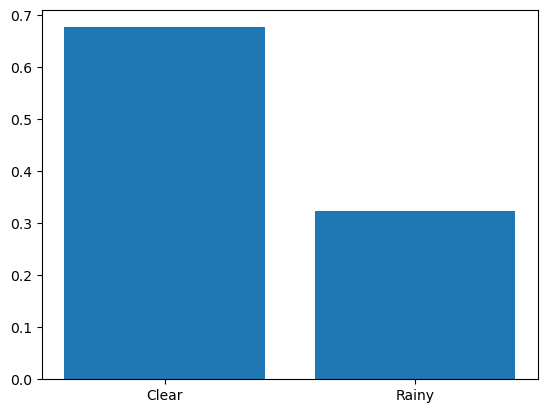

Prediction at time 2: [0.55514793 0.44485207]


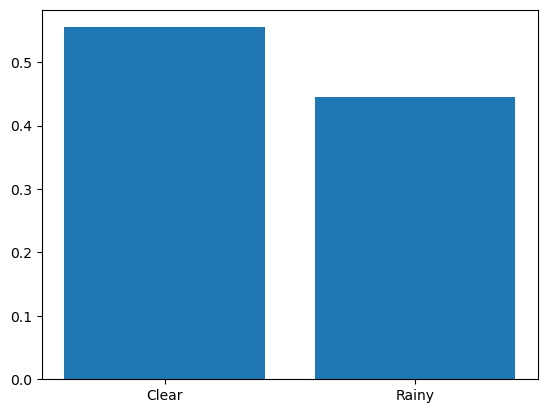

Prediction at time 3: [0.50924807 0.49075193]


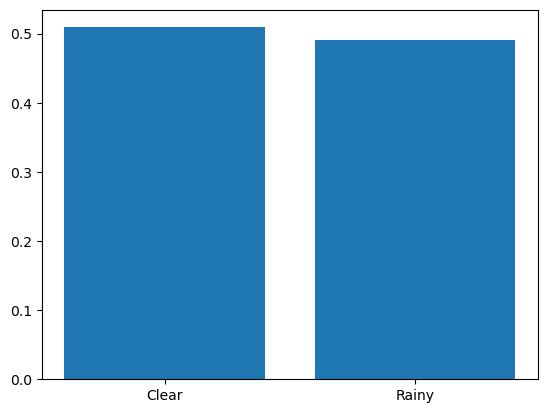

Prediction at time 4: [0.49194735 0.50805265]


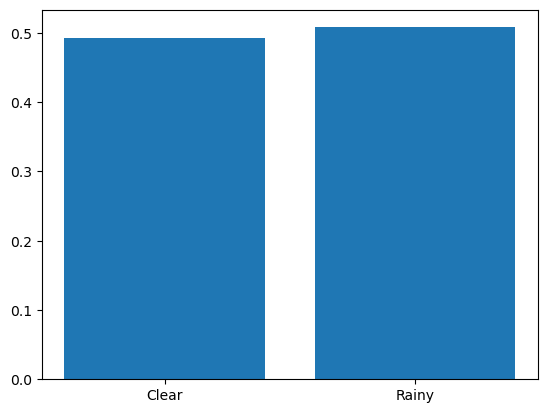

Prediction at time 5: [0.48542631 0.51457369]


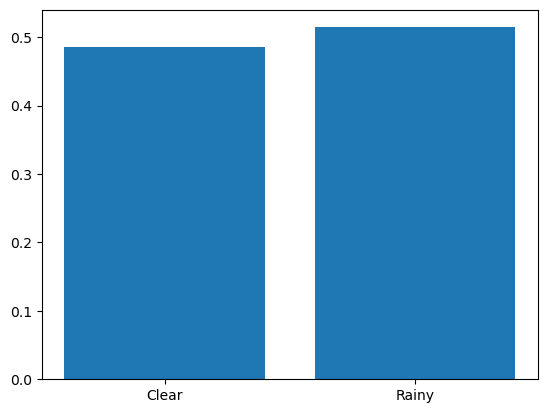

Prediction at time 6: [0.48296838 0.51703162]


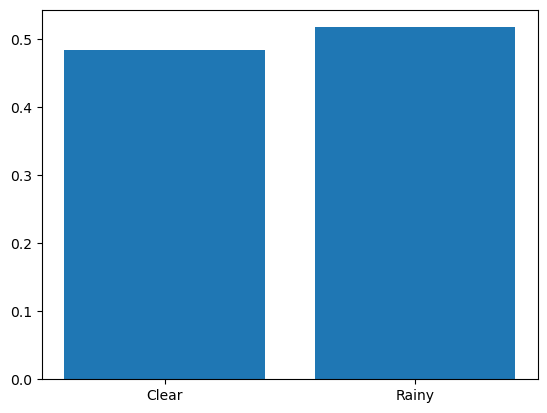

Prediction at time 7: [0.48204193 0.51795807]


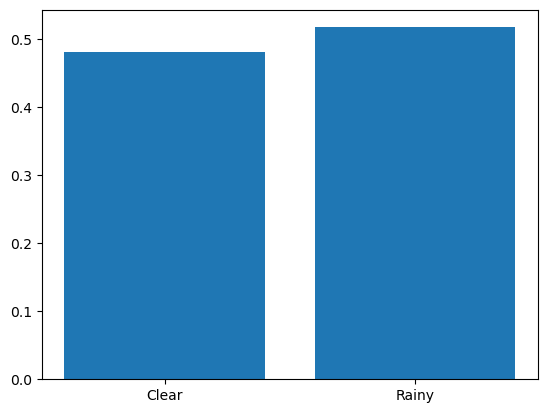

Prediction at time 8: [0.48169273 0.51830727]


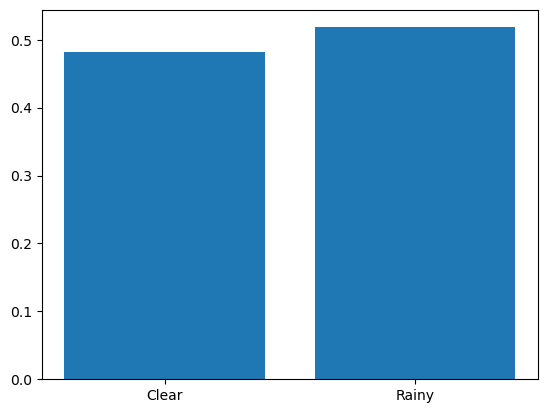

Prediction at time 9: [0.4815611 0.5184389]


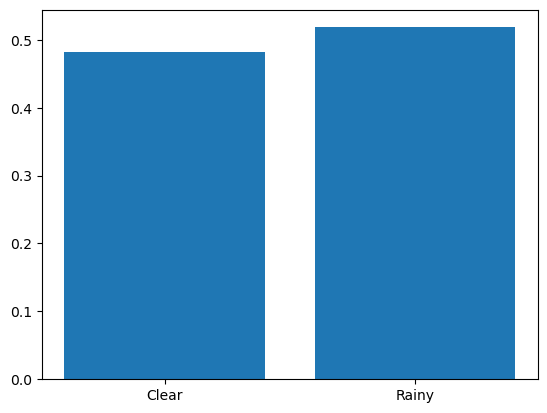

Total iterations: 9
Final prediction: [0.4815611 0.5184389]


In [15]:
eps = .0000001 # error tolerance
p_old = np.array([1,0]) # start from a clear day, with no rain
t = 0 # count of iterations
error = 10 # initial error

while( error > eps ): # check whether error excees tolerance
    p_new = T @ p_old # compute new mass function
    error = np.sum( (p_new - p_old)**2 ) # computer difference between current and old mass functions
    p_old = p_new # replace old with new
    t += 1 # iterate the count
    ##
    print(f'Prediction at time {t}: {p_new}')
    plt.bar(['Clear', 'Rainy'],p_new)
    plt.show()

print(f'Total iterations: {t}')
print(f'Final prediction: {p_new}')

Prediction at time 1: [0.3 0.7]


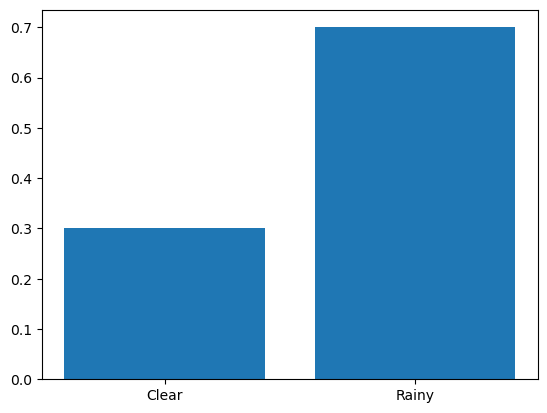

Prediction at time 2: [0.41307692 0.58692308]


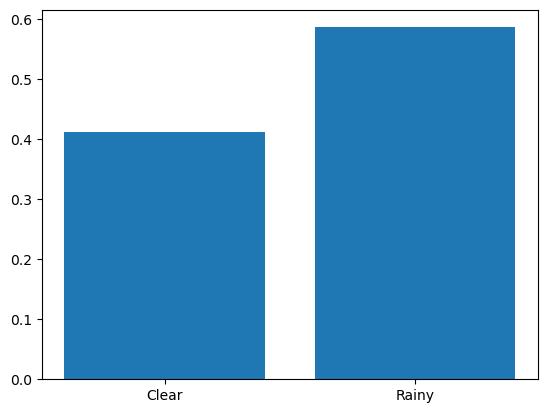

Prediction at time 3: [0.45569822 0.54430178]


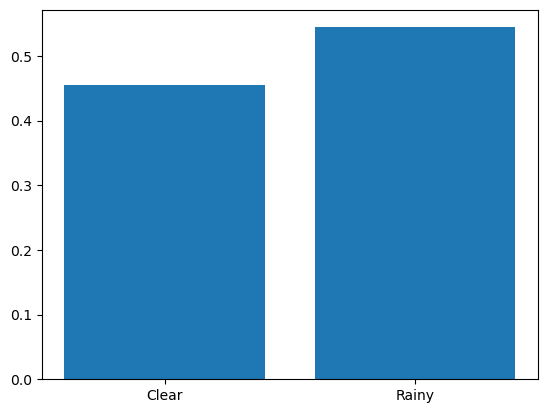

Prediction at time 4: [0.47176318 0.52823682]


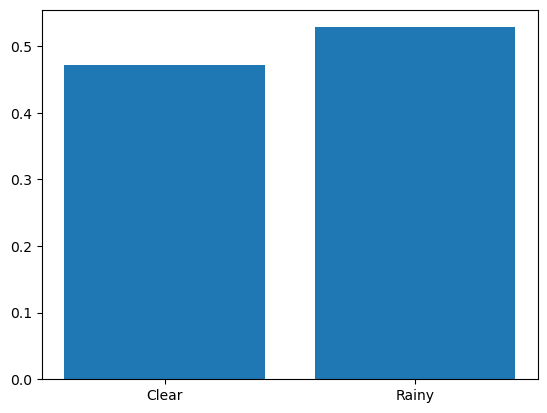

Prediction at time 5: [0.47781843 0.52218157]


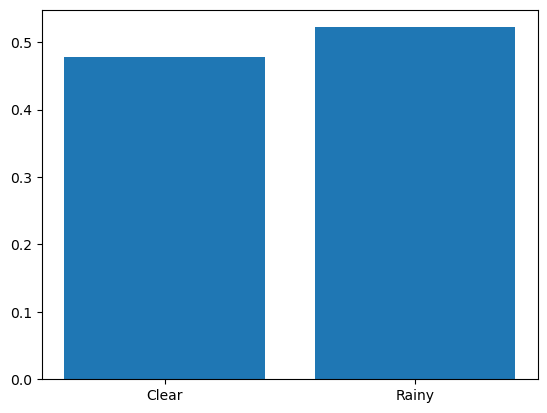

Prediction at time 6: [0.48010079 0.51989921]


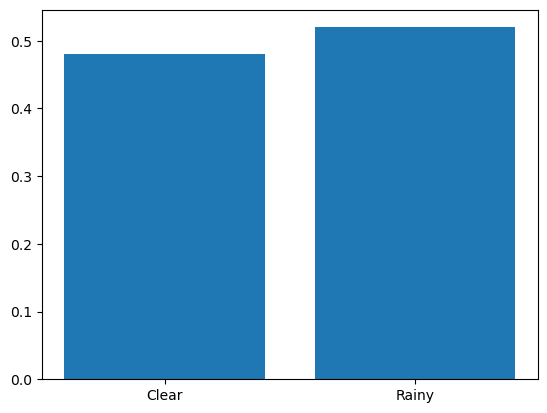

Prediction at time 7: [0.48096107 0.51903893]


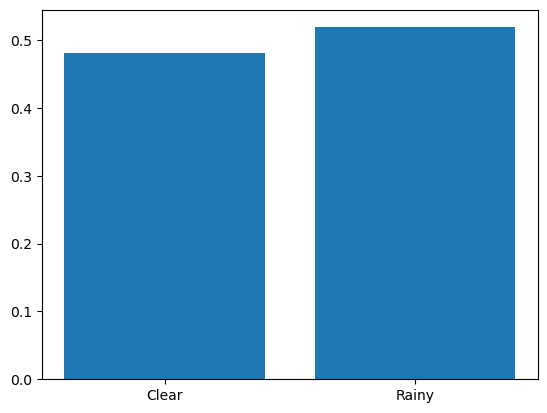

Prediction at time 8: [0.48128533 0.51871467]


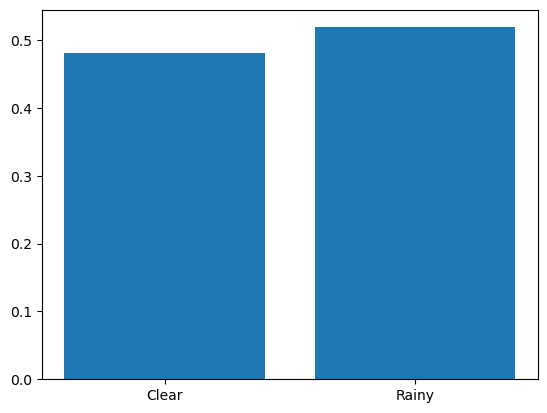

Prediction at time 9: [0.48140755 0.51859245]


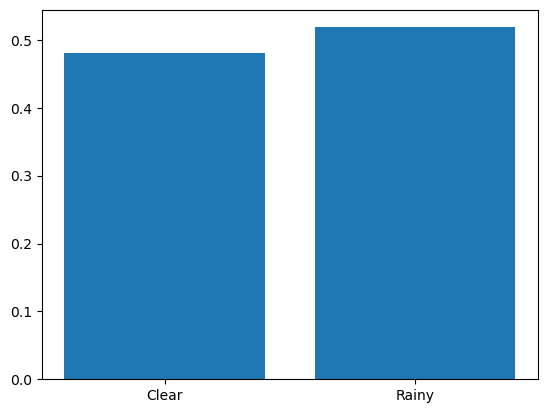

Total iterations: 9
Final prediction: [0.48140755 0.51859245]


In [16]:
eps = .0000001 # error tolerance
p_old = np.array([0,1]) # start from a rainy day
t = 0 # count of iterations
error = 10 # initial error

while( error > eps ): # check whether error excees tolerance
    p_new = T @ p_old # compute new mass function
    error = np.sum( (p_new - p_old)**2 ) # computer difference between current and old mass functions
    p_old = p_new # replace old with new
    t += 1 # iterate the count
    ##
    print(f'Prediction at time {t}: {p_new}')
    plt.bar(['Clear', 'Rainy'],p_new)
    plt.show()

print(f'Total iterations: {t}')
print(f'Final prediction: {p_new}')

<Axes: ylabel='Density'>

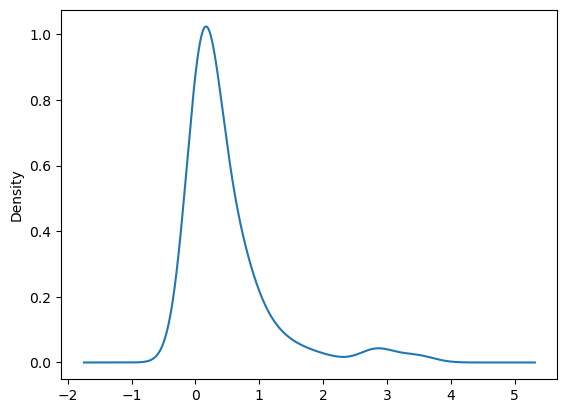

In [17]:
#- Conditional on being rainy, plot a KDE of the `PRCP` variable.
df.loc[ df['rain']==1,'PRCP'].plot.kde()

#- Describe one way of making your model better for forecasting and simulation the weather.

Ways to improve:
- Include seasons
- Include a higher order transition, which might be more realistic
- Conditional on the state, draw a value for preciptiation from the KDE

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import pickle

with open('taxicab.pkl','rb') as f:
    data = pickle.load(f)

print(list(data[0]))

['Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Central Park', 'Central Park', 'Upper East Side', 'Upper East Side', 'Upper West Side', 'Upper West Side', 'Outside Manhattan', 'Lower East Side', 'Gramercy', 'Kips Bay', 'Midtown', 'Chelsea', 'Outside Manhattan', 'Outside Manhattan', 'Midtown', 'Midtown', 'Theater District', 'Financial District', 'Midtown', 'Theater District', 'Theater District', 'Midtown', 'Midtown', 'Chelsea', 'Greenwich Village', 'Midtown', 'Murray Hill', 'Kips Bay', 'Kips Bay', 'Chelsea', 'Chelsea', 'Greenwich Village', 'Greenwich Village', 'Upper East Side', 'Upper East Side', 'Upper East Side', 'Midtown', 'Midtown', 'Outside Manhattan', 'Outside Manhattan', 'Murray Hill', 'Midtown', 'Upper East Side', 'Upper East Side', 'Upper East Side', 'Upper West Side', 'Theater District', 'East Harlem', 'Upper East Side', 'East Harlem', 'East Harlem', 'Upper East Side', 'Upper 

In [19]:
# - For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.

states = set()
for k in range(len(data)):
    states = states.union( set(list(data[k]))) 
states = list(states)
S = len(states)

print(f'Total number of states: {S}')

Total number of states: 38


In [20]:
# - Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
counts = np.zeros((S,S)) # Counts of state visits

for k in range(len(data)):
    trip = list(data[k])
    for s in range(1,len(trip)):
        x_s = trip[s] # Current state
        x_sm1 = trip[s-1] # Previous state

        i_s = states.index(x_s) # Look up the index of current state
        i_sm1 = states.index(x_sm1) # Look up the index of previous state

        counts[i_s, i_sm1] += 1 # Increment the count by one for that (i_s, i_sm1) pair

print(f'\n Total transition counts: \n {counts}')


 Total transition counts: 
 [[1.1234e+04 7.7900e+02 2.8680e+03 ... 5.7700e+02 4.2000e+01 2.1000e+02]
 [3.2000e+02 1.1193e+05 6.9300e+02 ... 9.5410e+03 1.1460e+03 1.0534e+04]
 [8.8610e+03 7.3900e+02 3.2397e+04 ... 5.3400e+02 5.2000e+01 2.2800e+02]
 ...
 [2.4200e+02 9.1460e+03 4.1300e+02 ... 7.8240e+04 1.5570e+03 4.1910e+03]
 [2.2000e+01 9.0200e+02 3.8000e+01 ... 1.1570e+03 3.9180e+03 3.8300e+02]
 [9.5000e+01 1.3836e+04 1.6100e+02 ... 6.9780e+03 1.0100e+03 2.5112e+04]]



 Transition proportions: 
 [[0.15490472 0.00152668 0.01762645 ... 0.00155705 0.00108834 0.00120468]
 [0.00441245 0.21935919 0.00425911 ... 0.02574661 0.02969604 0.0604291 ]
 [0.12218361 0.00144828 0.19910884 ... 0.00144101 0.00134746 0.00130794]
 ...
 [0.00333692 0.01792423 0.00253826 ... 0.21113249 0.04034619 0.02404199]
 [0.00030336 0.00176773 0.00023354 ... 0.00312219 0.10152626 0.00219711]
 [0.00130995 0.02711564 0.00098949 ... 0.0188303  0.02617191 0.14405691]]


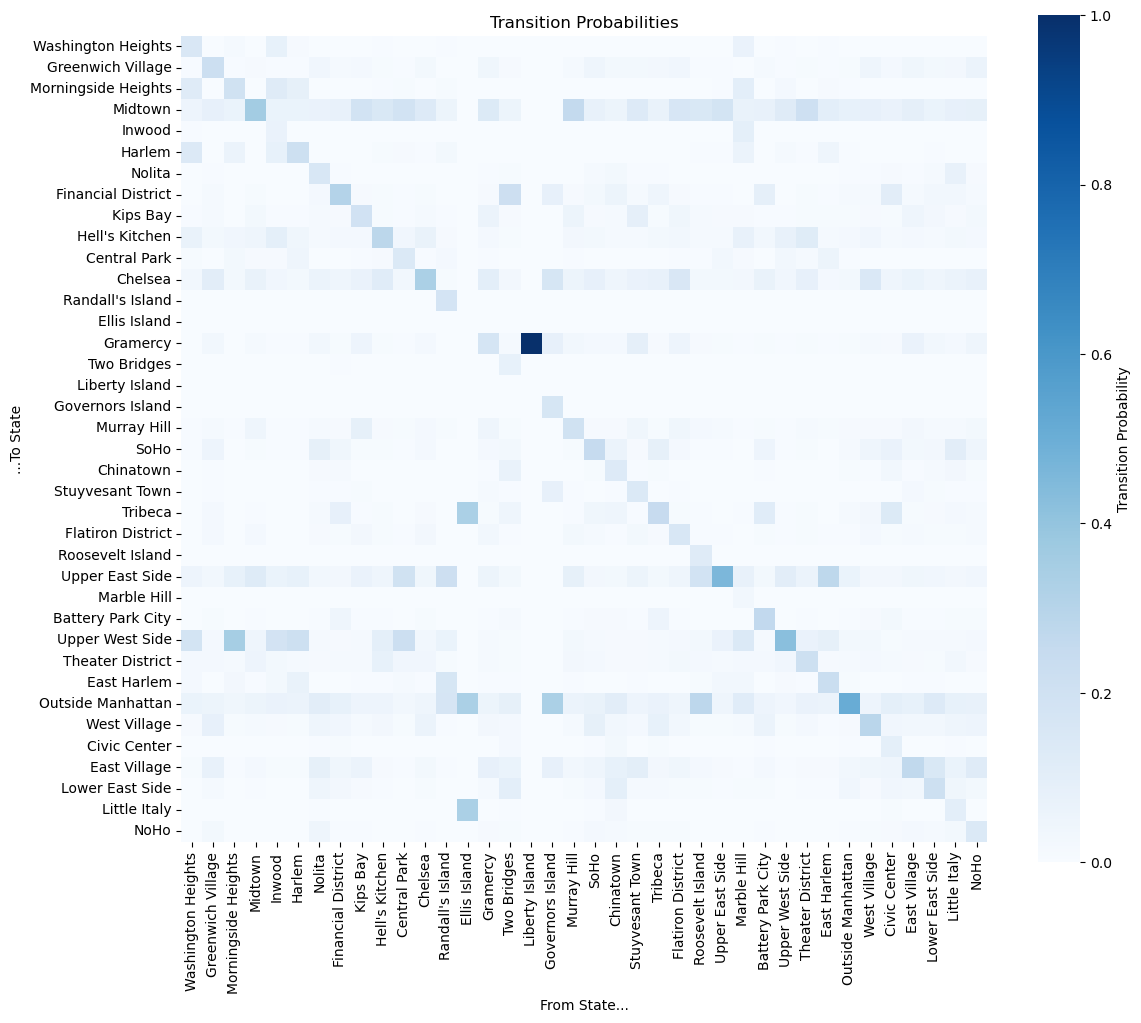

In [21]:

sums = np.sum( counts, axis = 0)
T = counts/sums # Normalize columns by column counts
print(f'\n Transition proportions: \n {T}')

plt.figure(figsize=(13, 11))
sns.heatmap(T, 
            cmap='Blues',
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.ylabel('...To State')
plt.xlabel('From State...')
plt.show()


### - Explain why taxicabs are most likely order 1, and not 2 or more.

The destination for a cab depends only on the rider, not the driver or the history of the cab. If we're in the Theater District and all the restaurants are in SoHo, lots of people seeing a play and going to dinner will want to go from Theater District to SoHo, for example. So the riders spawned from the current neighborhood probably share similar preferences over their next destinations, so the appropriate order of the chain is likely to be 1 and not more.

Prediction at time 0: [4.52408859e-03 9.91150298e-03 4.15000796e-03 1.50241560e-01
 1.21208656e-03 8.76312447e-03 1.65069201e-03 9.02367408e-03
 8.61855620e-03 2.82865392e-01 1.18619495e-02 1.14573217e-01
 6.12577440e-05 0.00000000e+00 8.17586690e-03 1.60903674e-04
 0.00000000e+00 0.00000000e+00 1.36457751e-02 1.08148505e-02
 1.86060188e-03 1.59188457e-03 8.53851274e-03 1.02039066e-02
 1.93574471e-04 4.53772864e-02 3.83881862e-05 6.74651954e-03
 9.62065121e-02 7.84148129e-02 5.61937705e-03 5.28548151e-02
 2.83950063e-02 8.87012133e-04 1.40459923e-02 5.36127775e-03
 7.39176778e-04 2.67083764e-03]


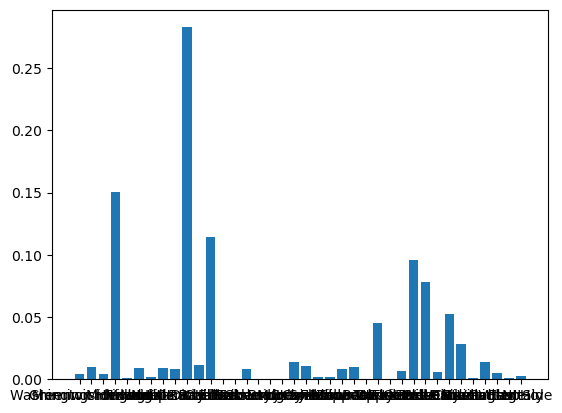

Prediction at time 1: [4.11375412e-03 1.69902516e-02 7.26751439e-03 1.72539627e-01
 8.75535391e-04 1.01955799e-02 2.99280231e-03 1.39957494e-02
 1.58420837e-02 1.19189523e-01 1.55954791e-02 1.08679876e-01
 1.06663233e-04 8.17980653e-08 1.52550503e-02 2.89087891e-04
 1.94244550e-08 2.54979257e-07 2.28744128e-02 1.77025010e-02
 3.06110359e-03 3.12302886e-03 1.33057145e-02 1.56182211e-02
 2.87638071e-04 8.69424540e-02 2.81495241e-05 8.62277369e-03
 9.89457482e-02 5.98866004e-02 9.85676020e-03 7.78243920e-02
 3.51745907e-02 1.67724988e-03 2.49787213e-02 1.00216934e-02
 1.18096714e-03 4.95834587e-03]


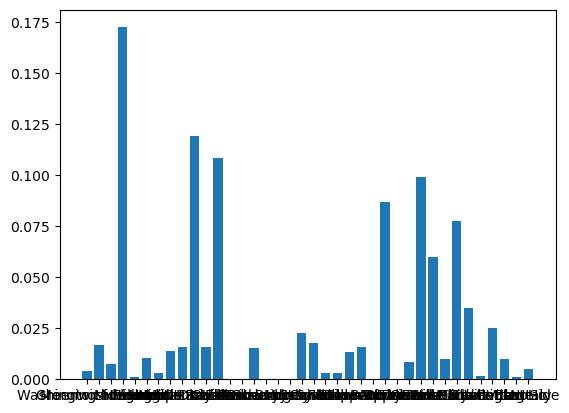

Prediction at time 2: [3.64021017e-03 2.00291444e-02 7.78131271e-03 1.72649032e-01
 7.23662900e-04 1.01390655e-02 3.78651561e-03 1.65435110e-02
 1.93915323e-02 7.51975983e-02 1.64007356e-02 9.71942861e-02
 1.33281370e-04 1.09409562e-07 1.88419181e-02 3.67389785e-04
 3.32973090e-08 3.98146815e-07 2.64678547e-02 2.10110247e-02
 3.78616623e-03 3.99805157e-03 1.55857127e-02 1.69750145e-02
 3.22779878e-04 1.07975810e-01 2.40027744e-05 9.29995104e-03
 9.15667995e-02 4.72456362e-02 1.21750856e-02 9.00164329e-02
 3.63665601e-02 2.09781771e-03 3.16542353e-02 1.29088045e-02
 1.41616587e-03 6.28635728e-03]


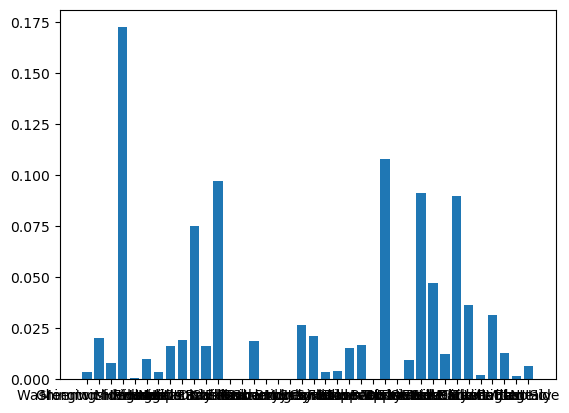

Prediction at time 3: [3.39448662e-03 2.12362224e-02 7.62536103e-03 1.70671366e-01
 6.66246142e-04 9.90460568e-03 4.20236309e-03 1.78358750e-02
 2.09249838e-02 6.14400978e-02 1.64815182e-02 9.08990089e-02
 1.46532448e-04 1.20365296e-07 2.04657801e-02 4.09102637e-04
 3.92528979e-08 4.63649944e-07 2.77317380e-02 2.25177276e-02
 4.18091198e-03 4.43713771e-03 1.66629287e-02 1.72013053e-02
 3.36870433e-04 1.16961170e-01 2.25207895e-05 9.60464087e-03
 8.59078881e-02 4.18028751e-02 1.32235930e-02 9.61983815e-02
 3.64402813e-02 2.30673644e-03 3.51893470e-02 1.44755828e-02
 1.54066547e-03 6.95352514e-03]


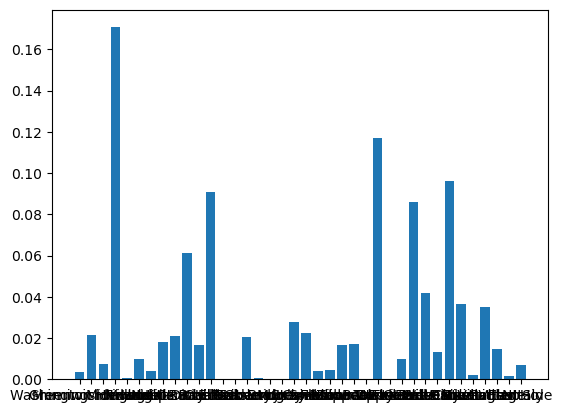

Prediction at time 4: [3.27626411e-03 2.17351629e-02 7.42061037e-03 1.69342661e-01
 6.42953259e-04 9.72516801e-03 4.41166475e-03 1.84951489e-02
 2.15753361e-02 5.65821806e-02 1.64063105e-02 8.80586873e-02
 1.52570683e-04 1.25393756e-07 2.11912799e-02 4.30283407e-04
 4.16185162e-08 4.93278318e-07 2.81846692e-02 2.32198887e-02
 4.38626275e-03 4.64762495e-03 1.71903462e-02 1.72108429e-02
 3.43110615e-04 1.20441193e-01 2.19436413e-05 9.76303188e-03
 8.25612626e-02 3.96188726e-02 1.36403288e-02 9.94007925e-02
 3.64006673e-02 2.41051129e-03 3.69486150e-02 1.52828708e-02
 1.60610334e-03 7.27412066e-03]


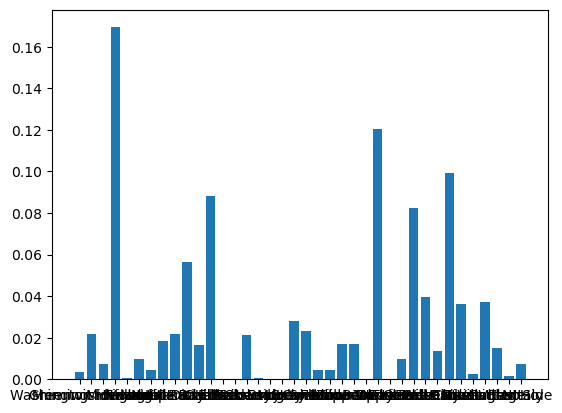

Prediction at time 5: [3.21872796e-03 2.19611416e-02 7.27919805e-03 1.68615513e-01
 6.32743415e-04 9.61275700e-03 4.51682576e-03 1.88359223e-02
 2.18584313e-02 5.47073578e-02 1.63174588e-02 8.68713050e-02
 1.55180474e-04 1.27896542e-07 2.15234283e-02 4.40939778e-04
 4.25963342e-08 5.07308834e-07 2.83590662e-02 2.35652823e-02
 4.49202371e-03 4.74777149e-03 1.74612616e-02 1.72007164e-02
 3.46048885e-04 1.21655017e-01 2.16973792e-05 9.85228735e-03
 8.07197093e-02 3.87347766e-02 1.37854018e-02 1.01075853e-01
 3.63997610e-02 2.46300203e-03 3.78102661e-02 1.56932412e-02
 1.64051321e-03 7.42869580e-03]


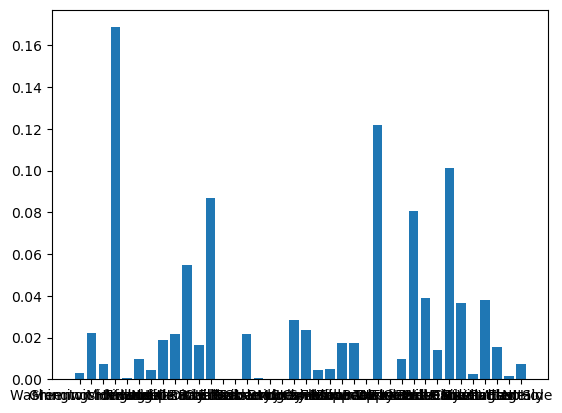

Prediction at time 6: [3.19004701e-03 2.20742931e-02 7.19489758e-03 1.68228590e-01
 6.28006972e-04 9.54660587e-03 4.57055811e-03 1.90152031e-02
 2.19870665e-02 5.39361617e-02 1.62475883e-02 8.63988921e-02
 1.56264554e-04 1.29188096e-07 2.16816052e-02 4.46349779e-04
 4.30392048e-08 5.14334591e-07 2.84322369e-02 2.37454721e-02
 4.54693529e-03 4.79609103e-03 1.76066283e-02 1.71978318e-02
 3.47470254e-04 1.22003845e-01 2.15846176e-05 9.90467034e-03
 7.97271832e-02 3.83651986e-02 1.38252822e-02 1.01956069e-01
 3.64269493e-02 2.49015480e-03 3.82365629e-02 1.59030171e-02
 1.65876169e-03 7.50523898e-03]


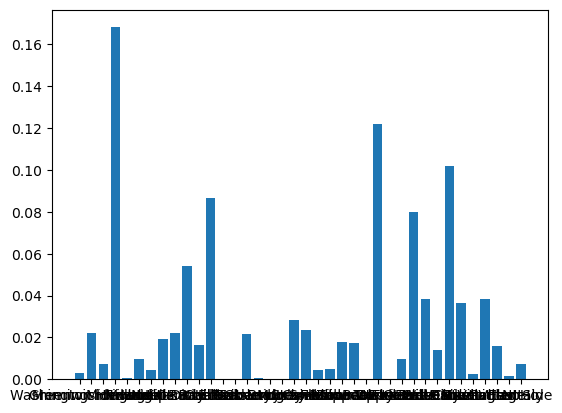

Prediction at time 7: [3.17540948e-03 2.21356785e-02 7.14704781e-03 1.68019237e-01
 6.25715710e-04 9.50854817e-03 4.59867616e-03 1.91113715e-02
 2.20482801e-02 5.36034194e-02 1.61993587e-02 8.62208985e-02
 1.56696486e-04 1.29866010e-07 2.17602437e-02 4.49144607e-04
 4.32609579e-08 5.18021168e-07 2.84653593e-02 2.38441584e-02
 4.57590260e-03 4.82000906e-03 1.76872714e-02 1.71999323e-02
 3.48164271e-04 1.22052186e-01 2.15301116e-05 9.93598200e-03
 7.91927477e-02 3.82046661e-02 1.38289775e-02 1.02420260e-01
 3.64606385e-02 2.50450930e-03 3.84524165e-02 1.60118074e-02
 1.66856406e-03 7.54450029e-03]


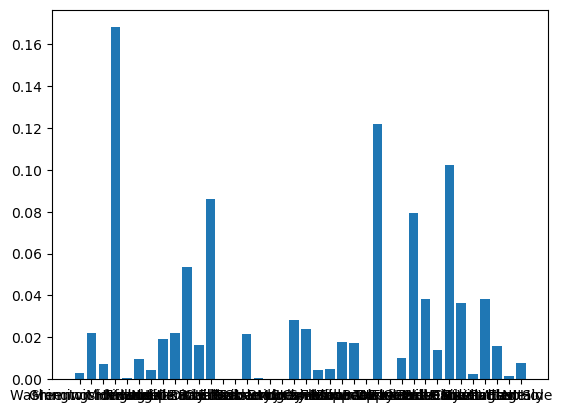

Prediction at time 8: [3.16777423e-03 2.21707338e-02 7.12028851e-03 1.67903163e-01
 6.24569318e-04 9.48680826e-03 4.61375017e-03 1.91639336e-02
 2.20786928e-02 5.34542091e-02 1.61680934e-02 8.61595438e-02
 1.56858558e-04 1.30225813e-07 2.18009400e-02 4.50617954e-04
 4.33812603e-08 5.20021897e-07 2.84812593e-02 2.39000623e-02
 4.59145900e-03 4.83220947e-03 1.77330440e-02 1.72034346e-02
 3.48504050e-04 1.22013747e-01 2.15025802e-05 9.95482217e-03
 7.89028194e-02 3.81321843e-02 1.38227234e-02 1.02666106e-01
 3.64899802e-02 2.51224514e-03 3.85647636e-02 1.60692147e-02
 1.67390259e-03 7.56534494e-03]


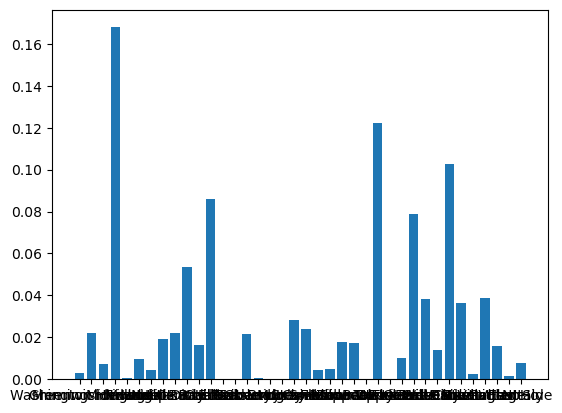

Prediction at time 9: [3.16371042e-03 2.21913156e-02 7.10533744e-03 1.67837502e-01
 6.23978968e-04 9.47439273e-03 4.62200330e-03 1.91931393e-02
 2.20943799e-02 5.33850208e-02 1.61485315e-02 8.61422005e-02
 1.56913008e-04 1.30418714e-07 2.18227265e-02 4.51410166e-04
 4.34499613e-08 5.21132769e-07 2.84892360e-02 2.39323918e-02
 4.59995464e-03 4.83861890e-03 1.77594064e-02 1.72066447e-02
 3.48670621e-04 1.21962680e-01 2.14881523e-05 9.96616633e-03
 7.87438499e-02 3.80982231e-02 1.38154758e-02 1.02797035e-01
 3.65119993e-02 2.51648215e-03 3.86248039e-02 1.61000326e-02
 1.67684760e-03 7.57673690e-03]


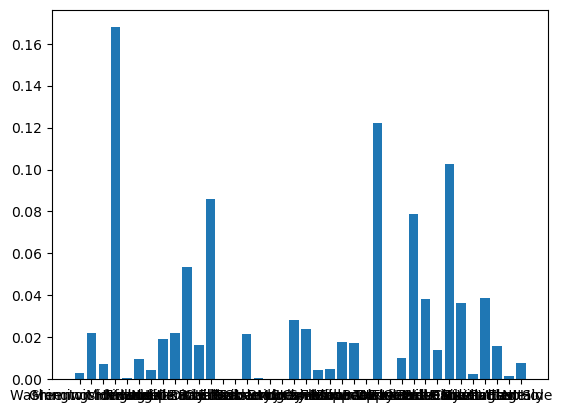

Prediction at time 10: [3.16150762e-03 2.22035541e-02 7.09694357e-03 1.67799853e-01
 6.23667236e-04 9.46728241e-03 4.62659877e-03 1.92095873e-02
 2.21027274e-02 5.33519448e-02 1.61365542e-02 8.61401313e-02
 1.56926859e-04 1.30523195e-07 2.18347045e-02 4.51843689e-04
 4.34902973e-08 5.21759034e-07 2.84933774e-02 2.39513021e-02
 4.60466163e-03 4.84207452e-03 1.77747242e-02 1.72090828e-02
 3.48752458e-04 1.21920528e-01 2.14803576e-05 9.97298308e-03
 7.86557014e-02 3.80817522e-02 1.38097021e-02 1.02867232e-01
 3.65272385e-02 2.51883382e-03 3.86576238e-02 1.61168347e-02
 1.67849035e-03 7.58310162e-03]


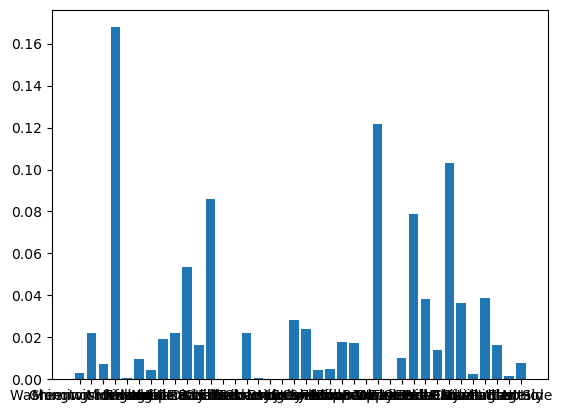

In [22]:
# - Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips

# Find hell's kitchen:
current_state = states.index("Hell's Kitchen")
forecast = np.zeros(S)
forecast[current_state] = 1

print_updates = {1,2,3,5,10}

for t in range(11):
    forecast = T @ forecast
    #if t in print_updates:
    print(f'Prediction at time {t}: {forecast}')
    plt.bar(states,forecast)
    plt.show()

Prediction at convergence in time 11: [3.14706890e-03 2.23202428e-02 7.03665676e-03 1.67505634e-01
 6.21778337e-04 9.41197850e-03 4.65943365e-03 1.93330626e-02
 2.21584927e-02 5.32351990e-02 1.60268380e-02 8.63226683e-02
 1.56560156e-04 1.31121936e-07 2.19237275e-02 4.54724599e-04
 4.38816729e-08 5.26386127e-07 2.85192707e-02 2.41169419e-02
 4.63675700e-03 4.86541503e-03 1.79030998e-02 1.72467694e-02
 3.48905898e-04 1.21300840e-01 2.14224750e-05 1.00364981e-02
 7.80479002e-02 3.80145156e-02 1.37274394e-02 1.03210782e-01
 3.67249380e-02 2.53471991e-03 3.88855003e-02 1.62220606e-02
 1.68969323e-03 7.63176368e-03]


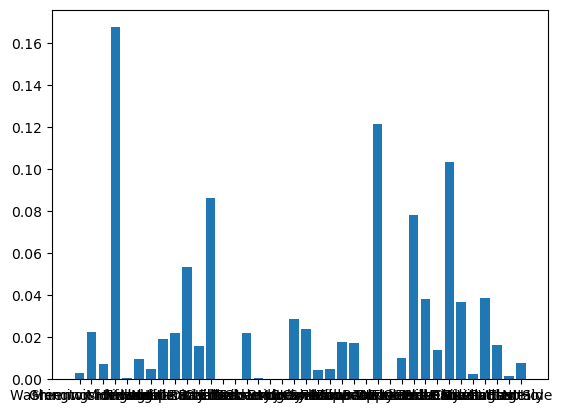

In [23]:
# - Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

current_state = states.index("Little Italy") # Start at Little Italy
old_forecast = np.zeros(S)
old_forecast[current_state] = 1

error = 10
tolerance = 1e-06
t = 0 
while( error > tolerance):
    new_forecast = T @ old_forecast
    error = np.sum( (old_forecast - new_forecast)**2 )
    old_forecast = new_forecast
    t += 1

print(f'Prediction at convergence in time {t}: {new_forecast}')
plt.bar(states,new_forecast)
plt.show()

gdf = pd.DataFrame({'Neighborhood':states,'Proportion':new_forecast})

In [24]:
gdf.sort_values('Proportion',ascending=False)

,Neighborhood,Proportion
3,Midtown,1.675056e-01
25,Upper East Side,1.213008e-01
31,Outside Manhattan,1.032108e-01
11,Chelsea,8.632267e-02
28,Upper West Side,7.804790e-02
9,Hell's Kitchen,5.323520e-02
34,East Village,3.888550e-02
29,Theater District,3.801452e-02
32,West Village,3.672494e-02
18,Murray Hill,2.851927e-02


The top five neighborhoods are Midtown, Upper East Side, Outside Manhattan, Chelsea, and Upper West Side.